In [258]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)  

Python version 3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version 0.21.1
Matplotlib version 2.0.2


## Feature Interpretation and normalisation

In [259]:
Location = r'train.csv'
df = pd.read_csv(Location, parse_dates=['booking_date', 'dep_date'])
#pd.to_datetime(pd.Series(sLength, index=df.index))
#print(type(df["Hour"][0]))

#testing Data
Location = r'test.csv'
test_df = pd.read_csv(Location, parse_dates=['booking_date', 'dep_date'])
#print(type(test_df["Hour"][0]))

maxPax  = max(df['pax'])
numDaysInYear = 366
numClasses = 4

#df['dep_time'] = pd.to_datetime(pd.Series(sLength, index=df.index))
#test_df['Day'] = pd.Series(sLength, index=df.index)

originList = df.origin.unique()
df = df.assign(journey=(df['origin'] + '_' + df['destination']).astype('category').cat.codes)
df = df.assign(origin=(df['origin']).astype('category').cat.codes)
df = df.assign(destination=(df['destination']).astype('category').cat.codes)
maxOrg  = max(df['origin'])+1
maxDest  = max(df['destination'])+1
df['origin'] = (df['origin']+1)/maxOrg
df['destination'] = (df['destination']+1)/maxDest
df['days'] = (((df['dep_date'] - df['booking_date'])/np.timedelta64(1, 'D')).astype(int)+1)/numDaysInYear
df['booking_weekday'] = (df['booking_date'].dt.dayofweek+1)/7
df['dep_weekday'] = (df['dep_date'].dt.dayofweek+1)/7
df['booking_date'] = (df['booking_date'].dt.dayofyear)/numDaysInYear
df['dep_date'] = (df['dep_date'].dt.dayofyear)/numDaysInYear
df['fare_choice_sc'] = (df.groupby(['fare_choice']).ngroup()+1)
df['dep_time_sc'] = (((df['dep_time']%100).astype(int)/5)+1 + ((df['dep_time']/100).astype(int)+1)*12)/((24*12))
df['pax'] = df['pax']/maxPax
#df['id2'] = df.groupby(['destination']).ngroup()
maxID  = max(df['journey'])+1
df['journey'] = (df['journey']+1)/maxID
print((df.ix[56109]))

maxPax  = max(test_df['pax'])
test_df = test_df.assign(journey=(test_df['origin'] + '_' + test_df['destination']).astype('category').cat.codes)
test_df = test_df.assign(origin=(df['origin']).astype('category').cat.codes)
test_df = test_df.assign(destination=(df['destination']).astype('category').cat.codes)
maxOrg  = max(test_df['origin'])+1
maxDest  = max(test_df['destination'])+1
test_df['origin'] = (test_df['origin']+1)/maxOrg
test_df['destination'] = (test_df['destination']+1)/maxDest
test_df['days'] = (((test_df['dep_date'] - test_df['booking_date'])/np.timedelta64(1, 'D')).astype(int)+1)/numDaysInYear
test_df['booking_weekday'] = (test_df['booking_date'].dt.dayofweek+1)/7
test_df['dep_weekday'] = (test_df['dep_date'].dt.dayofweek+1)/7
test_df['booking_date'] = (test_df['booking_date'].dt.dayofyear)/numDaysInYear
test_df['dep_date'] = (test_df['dep_date'].dt.dayofyear)/numDaysInYear
test_df['dep_time_sc'] = (((test_df['dep_time']%100).astype(int)/5)+1 + ((test_df['dep_time']/100).astype(int)+1)*12)/((24*12))
test_df['pax'] = test_df['pax']/maxPax
#df['id2'] = df.groupby(['destination']).ngroup()
maxID  = max(test_df['journey'])+1
test_df['journey'] = (test_df['journey']+1)/maxID
print(maxPax)

#print(df.groupby('days').mean())
df.head()
#df.sort_values(['days'], ascending=True)
#test_df.head()

#print(df.origin.unique())
#print(test_df.origin.unique())
#print(df.destination.unique())
#print(test_df.destination.unique())
#df.destination.unique()

id                    56110
booking_date              1
origin             0.285714
destination             0.6
dep_date           0.461749
dep_time               1255
pax                0.142857
fare_choice            Deal
journey            0.266667
days               0.464481
booking_weekday    0.857143
dep_weekday               1
fare_choice_sc            2
dep_time_sc        0.583333
Name: 56109, dtype: object
7


/Users/eabraham/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,id,booking_date,origin,destination,dep_date,dep_time,pax,fare_choice,journey,days,booking_weekday,dep_weekday,fare_choice_sc,dep_time_sc
0,1,0.112022,1.000000,0.8,0.415301,630,0.285714,Deal,1.000000,0.306011,0.714286,0.571429,2,0.315972
1,2,0.401639,0.571429,0.4,0.415301,1745,0.142857,Classic,0.600000,0.016393,0.857143,0.571429,1,0.784722
2,3,0.409836,0.285714,0.8,0.415301,900,0.142857,Saver,0.333333,0.008197,0.285714,0.571429,4,0.420139
3,4,0.409836,0.285714,0.2,0.415301,2130,0.285714,Classic,0.200000,0.008197,0.285714,0.571429,1,0.940972
4,5,0.409836,0.571429,0.4,0.415301,1240,0.142857,Classic,0.600000,0.008197,0.285714,0.571429,1,0.572917


## remaining days vs fare choice

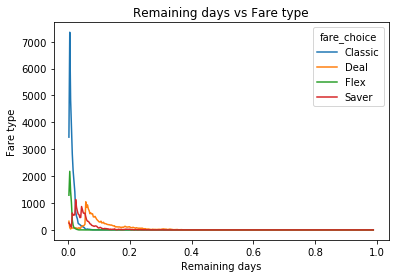

In [260]:
%matplotlib inline
pd.crosstab(df.days,df.fare_choice).plot(kind='line')
plt.title('Remaining days vs Fare type')
plt.xlabel('Remaining days')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_time vs fare choice

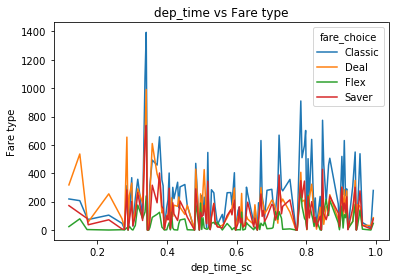

In [261]:
%matplotlib inline
pd.crosstab(df.dep_time_sc,df.fare_choice).plot(kind='line')
plt.title('dep_time vs Fare type')
plt.xlabel('dep_time_sc')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## journey vs fare choice

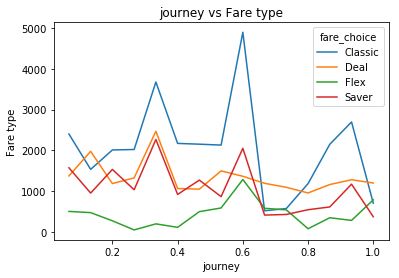

In [262]:
%matplotlib inline
pd.crosstab(df.journey,df.fare_choice).plot(kind='line')
plt.title('journey vs Fare type')
plt.xlabel('journey')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## booking_weekday vs fare choice

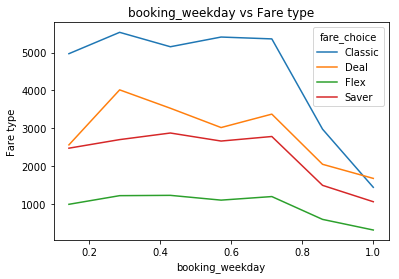

In [263]:
%matplotlib inline
pd.crosstab(df.booking_weekday,df.fare_choice).plot(kind='line')
plt.title('booking_weekday vs Fare type')
plt.xlabel('booking_weekday')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_weekday vs fare choice

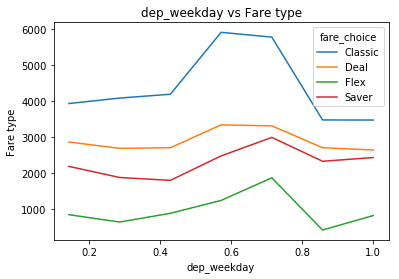

In [264]:
%matplotlib inline
pd.crosstab(df.dep_weekday,df.fare_choice).plot(kind='line')
plt.title('dep_weekday vs Fare type')
plt.xlabel('dep_weekday')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## passengers vs fare choice

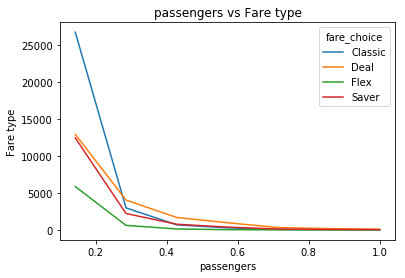

In [265]:
%matplotlib inline
pd.crosstab(df.pax,df.fare_choice).plot(kind='line')
plt.title('passengers vs Fare type')
plt.xlabel('passengers')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## dep_date vs fare choice

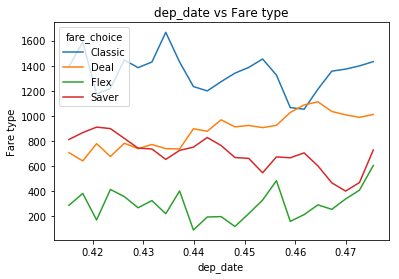

In [266]:
%matplotlib inline
pd.crosstab(df.dep_date,df.fare_choice).plot(kind='line')
plt.title('dep_date vs Fare type')
plt.xlabel('dep_date')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## booking_date vs fare choice

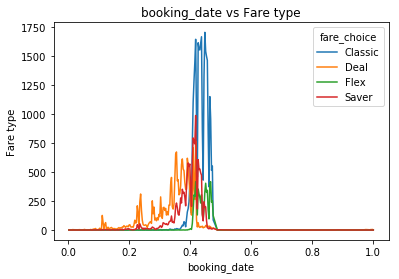

In [267]:
%matplotlib inline
pd.crosstab(df.booking_date,df.fare_choice).plot(kind='line')
plt.title('booking_date vs Fare type')
plt.xlabel('booking_date')
plt.ylabel('Fare type')
plt.savefig('purchase_fre_job')

## Training data feature selection

In [268]:
#select columns here for features
flightDataPd = df[['origin','destination','journey','pax', 'days','dep_time_sc','booking_weekday','dep_weekday','booking_date','dep_date','fare_choice_sc']]
flightData = flightDataPd.as_matrix(columns=flightDataPd.columns[0:])
print(flightData)
#change the length of the features based on the selection
featureLength = 10
X = flightData[:,0:featureLength]
#print(X)
y = flightData[:,featureLength]
#print(y)
print(max(df['origin']))
print(max(df['destination']))
print(max(df['journey']))
print(max(df['pax']))
print(max(df['days']))
print(max(df['dep_time_sc']))
print(max(df['booking_weekday']))
print(max(df['dep_weekday']))
print(max(df['booking_date']))
print(max(df['dep_date']))
print(max(df['fare_choice_sc']))

flightDataPd.head()

[[ 1.          0.8         1.         ...,  0.11202186  0.41530055  2.        ]
 [ 0.57142857  0.4         0.6        ...,  0.40163934  0.41530055  1.        ]
 [ 0.28571429  0.8         0.33333333 ...,  0.40983607  0.41530055  4.        ]
 ..., 
 [ 0.57142857  0.4         0.6        ...,  0.3715847   0.47540984  2.        ]
 [ 0.42857143  0.4         0.46666667 ...,  0.40983607  0.47540984  2.        ]
 [ 0.28571429  1.          0.4        ...,  0.46721311  0.47540984  1.        ]]
1.0
1.0
1.0
1.0
0.9890710382513661
0.9930555555555556
1.0
1.0
1.0
0.47540983606557374
4


,origin,destination,journey,pax,days,dep_time_sc,booking_weekday,dep_weekday,booking_date,dep_date,fare_choice_sc
0,1.000000,0.8,1.000000,0.285714,0.306011,0.315972,0.714286,0.571429,0.112022,0.415301,2
1,0.571429,0.4,0.600000,0.142857,0.016393,0.784722,0.857143,0.571429,0.401639,0.415301,1
2,0.285714,0.8,0.333333,0.142857,0.008197,0.420139,0.285714,0.571429,0.409836,0.415301,4
3,0.285714,0.2,0.200000,0.285714,0.008197,0.940972,0.285714,0.571429,0.409836,0.415301,1
4,0.571429,0.4,0.600000,0.142857,0.008197,0.572917,0.285714,0.571429,0.409836,0.415301,1


## Testing data feature selection

In [269]:
#select columns here for features
flightDataTestPd = test_df[['origin','destination','journey','pax', 'days','dep_time_sc','booking_weekday','dep_weekday','booking_date','dep_date']]
flightDataTest = flightDataTestPd.as_matrix(columns=flightDataTestPd.columns[0:])

#change the length of the features based on the selection
data_X_testF = flightDataTest[:,0:featureLength]
#data_y_testF = flightDataTest[:,featureLength-1]
#print(data_y_test)
flightDataTestPd.head()

,origin,destination,journey,pax,days,dep_time_sc,booking_weekday,dep_weekday,booking_date,dep_date
0,1.000000,0.8,0.133333,0.285714,0.177596,0.784722,0.714286,0.857143,0.303279,0.478142
1,0.571429,0.4,0.333333,0.285714,0.087432,0.753472,0.428571,0.857143,0.393443,0.478142
2,0.285714,0.8,0.133333,0.142857,0.202186,0.336806,0.428571,0.857143,0.278689,0.478142
3,0.285714,0.2,0.133333,0.285714,0.010929,0.520833,0.428571,0.857143,0.469945,0.478142
4,0.571429,0.4,0.266667,0.142857,0.068306,0.840278,0.428571,0.857143,0.412568,0.478142


In [270]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1]


## Training

In [290]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier



data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#LOGISTIC REGRESSION
#regr = linear_model.LogisticRegression()
# Train the model using the training sets
#regr.fit(data_X_train, data_y_train)

#Support Vector Classification
#regr = svm.SVC(C = 1.0, probability=True, kernel='rbf')
#regr.fit(data_X_train,data_y_train)

#RANDOM FOREST
regr = RandomForestClassifier(max_depth=10, random_state=0)
regr.fit(data_X_train,data_y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Prediction and writing the results in CSV

In [291]:
# predict class labels for the test set
predicted = regr.predict(data_X_test)
predicted_prob = regr.predict_proba(data_X_testF)
print(data_y_test)
print(predicted)


#print(regr.score(data_y_test,predicted))

idx = 0
df_y_pred = pd.DataFrame(predicted_prob)
df_y_pred.insert(loc=idx, column='id', value=np.nan)
df_y_pred['id'] = df_y_pred.index + 73831
print(df_y_pred.head(20))
prediction_location = r'prediction.csv'
df_y_pred.to_csv(prediction_location, index=False, header=['id', 'Classic', 'Deal', 'Flex', 'Saver'])

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regr.score(data_X_test, data_y_test)))

# The mean squared error
print("Mean absolute error: %.2f"
      % mean_absolute_error(data_y_test, predicted))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_y_test, predicted))



[ 4.  1.  4. ...,  2.  2.  4.]
[ 4.  1.  1. ...,  2.  2.  2.]
       id         0         1         2         3
0   73831  0.000952  0.905363  0.000375  0.093310
1   73832  0.013455  0.725392  0.000000  0.261154
2   73833  0.001643  0.900128  0.000000  0.098229
3   73834  0.860160  0.010580  0.103724  0.025535
4   73835  0.084336  0.416303  0.000000  0.499360
5   73836  0.027028  0.714851  0.000000  0.258121
6   73837  0.328283  0.018380  0.647411  0.005926
7   73838  0.802669  0.015877  0.171257  0.010197
8   73839  0.612424  0.005290  0.367687  0.014599
9   73840  0.624429  0.057536  0.001695  0.316341
10  73841  0.608214  0.017521  0.362637  0.011629
11  73842  0.451564  0.004350  0.538236  0.005850
12  73843  0.548149  0.042025  0.015000  0.394826
13  73844  0.305205  0.022617  0.666749  0.005429
14  73845  0.584432  0.140199  0.000690  0.274680
15  73846  0.022484  0.495423  0.000000  0.482093
16  73847  0.076199  0.634215  0.000000  0.289586
17  73848  0.379024  0.021806  0.58690

## Cross validation

In [292]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(regr, data_X_train, data_y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.819
